<br></br>
<h1><center>Assignment 07</h1></center>
<h1><center>Support Vector Machines (SVM)</h1></center>
<h2><center>Benedek Dankó</h2></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load data:
data = load_iris()
# select features:
X = data.data
# scale data:
X_scaled = preprocessing.scale(X)

In [3]:
# 3 types of y variables:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

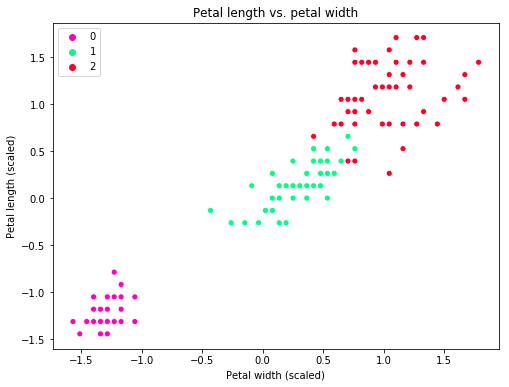

In [4]:
# Plot petal length versus petal width:
plt.figure(figsize=(8, 6))
plt.title('Petal length vs. petal width')
plt.xlabel('Petal width (scaled)')
plt.ylabel('Petal length (scaled)')
sns.scatterplot(X_scaled[:,2], X_scaled[:,3], hue = data.target, palette="gist_rainbow_r")
plt.show()
# 0: setosa, 1: versicolor, 2: virginica 

In [5]:
# feature names in order (0, 1, 2, 3):
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# select data:
X_scaled_selected = X_scaled[0:100,2:4] # setosa, versicolor rows only, and only petal length, petal width columns
Y_selected = data.target[:100] # setosa, versicolor only

Support vectors: [[-1.17067529 -0.91855782]
 [-1.227541   -0.78708485]
 [-1.05694388 -1.05003079]
 [-0.26082403 -0.26119297]
 [-0.43142114 -0.12972   ]]

Support vectors: [[-1.227541   -0.78708485]
 [-0.43142114 -0.12972   ]]



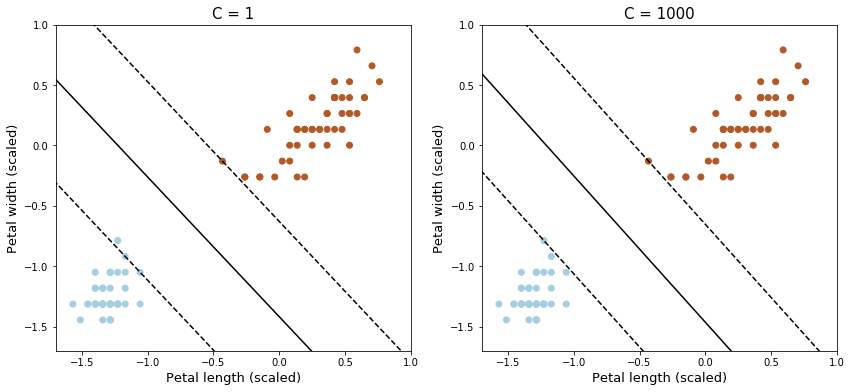

In [7]:
# Plot the decision boundaries

X = X_scaled_selected
Y = Y_selected

# fit the model
clf = SVC(kernel='linear', random_state=0, C=1.0)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].plot(xx, yy, 'k-')
ax[0].plot(xx, yy_down, 'k--')
ax[0].plot(xx, yy_up, 'k--')

ax[0].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
print('Support vectors: {}\n'.format(clf.support_vectors_))
ax[0].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax[0].set_xlim(-1.7, 1)
ax[0].set_ylim(-1.7, 1)
ax[0].axes.set_title('C = 1',fontsize=15)
ax[0].set_ylabel('Petal width (scaled)',fontsize=13)
ax[0].set_xlabel('Petal length (scaled)',fontsize=13)

# fit the model
clf = SVC(kernel='linear', random_state=0, C=1000.0)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

ax[1].plot(xx, yy, 'k-')
ax[1].plot(xx, yy_down, 'k--')
ax[1].plot(xx, yy_up, 'k--')

ax[1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
print('Support vectors: {}\n'.format(clf.support_vectors_))
ax[1].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax[1].set_xlim(-1.7, 1)
ax[1].set_ylim(-1.7, 1)
ax[1].axes.set_title('C = 1000',fontsize=15)
ax[1].set_ylabel('Petal width (scaled)',fontsize=13)
ax[1].set_xlabel('Petal length (scaled)',fontsize=13)

plt.show()

# blue: setosa
# red: versicolor

C hyperparameter: basically it determines the number and severity of the violations to the margin (and to the hyperplane) that we will tolerate. The higher the C hyperparameter, the narrower the margin, so we have fewer support vectors (points) as well. With C = 1 there are 5 support vectors, whereas with C = 1000 there are only 2 support vectors in this case.

### 2.) Linear SVC but non-linear separation

In [8]:
# create dataset: 
X, y = make_moons(noise=0.1, random_state=0)

In [9]:
# scale X:
X_scaled = preprocessing.scale(X)

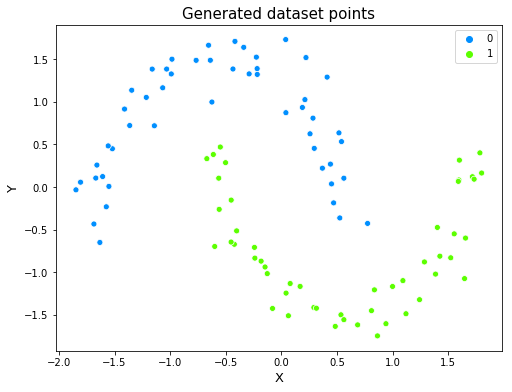

In [10]:
# Plot data (scaled):
plt.figure(figsize=(8, 6))
plt.title('Generated dataset points', size=15)
plt.xlabel('X', size=13)
plt.ylabel('Y', size=13)
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], palette='gist_rainbow_r', hue=y)
plt.show()

In [11]:
# Polynomial transformation of data:
trans = PolynomialFeatures(degree=3)
X_transformed = trans.fit_transform(X) # transform data to 3rd degree polynomial
X_transformed = np.delete(X_transformed, 0, 1) # remove the bias column
X_transformed_scaled = preprocessing.scale(X_transformed) # scale X variables

I apply PCA dimensional reduction on the data to be able to plot the data in 2D. <br>
Maybe this is not the perfect solution, but I think it is still a meaningful visualization:

In [12]:
pca = PCA(n_components=2) # set up PCA
Xreduced = pca.fit_transform(X_transformed_scaled) # apply PCA

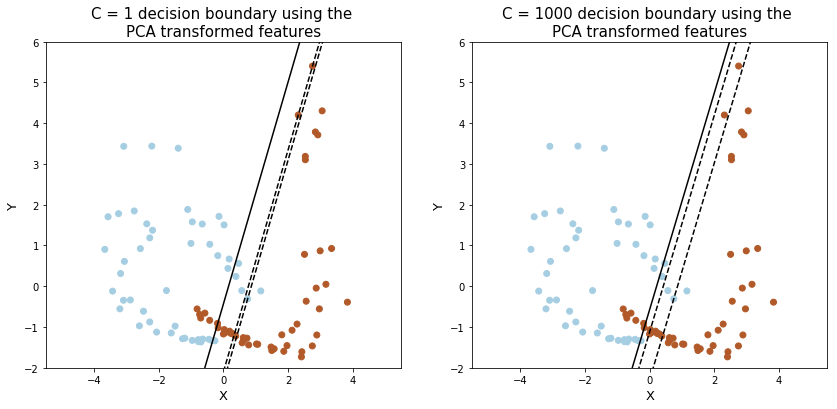

In [13]:
# fit the model
clf = SVC(kernel='linear', random_state=0, C=1.0)
clf.fit(Xreduced, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].plot(xx, yy, 'k-')
ax[0].plot(xx, yy_down, 'k--')
ax[0].plot(xx, yy_up, 'k--')

ax[0].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
ax[0].scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, cmap=plt.cm.Paired)

#ax[0].set_xlim(0.8, 1.2)
ax[0].set_ylim(-2, 6)
ax[0].axes.set_title('C = 1 decision boundary using the \nPCA transformed features',fontsize=15)
ax[0].set_ylabel('Y',fontsize=13)
ax[0].set_xlabel('X',fontsize=13)

# fit the model
clf = SVC(kernel='linear', random_state=0, C=1000.0)
clf.fit(Xreduced, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

ax[1].plot(xx, yy, 'k-')
ax[1].plot(xx, yy_down, 'k--')
ax[1].plot(xx, yy_up, 'k--')

ax[1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
ax[1].scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, cmap=plt.cm.Paired)
#ax[1].set_xlim(0.8, 1.2)
ax[1].set_ylim(-2, 6)
ax[1].axes.set_title('C = 1000 decision boundary using the \nPCA transformed features',fontsize=15)
ax[1].set_ylabel('Y',fontsize=13)
ax[1].set_xlabel('X',fontsize=13)

plt.show()

The 9-dimensional data was projected to two principal components using PCA. That's why the decision boundaries, margins might look strange.

Support Vector Machine (SVM) looks for a hyperplane which separates the defined classes. It uses soft margins (allows a few misclassifications - depends on the C hyperparameter) to find the separating hyperplane's exact location. SVM considers only the support vectors (those points that are in the margin) when looking for the separating hyperplane. Kernel functions help to determine classes when linear separation is not an option.

### 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings


In [14]:
# read data, drop unnecessary columns:
df = pd.read_excel('../data/aar3247_Cohen_SM_Tables-S1-S11.xlsx', sheet_name='Table S6', header=2,
                  nrows=1817)

# create list storing whether sample is cancerous (1) or not (0)
df['CancerSEEK Test Result'][df['CancerSEEK Test Result'] == 'Positive'] = 1
df['CancerSEEK Test Result'][df['CancerSEEK Test Result'] == 'Negative'] = 0

cseekY = df['CancerSEEK Test Result'].to_list() # predicted by CancerSEEK
cseek_score = df['CancerSEEK Logistic Regression Score'].to_list() # CancerSEEK model pred. probabilities
trueY = [0 if i == 'Normal' else 1 for i in df['Tumor type'].to_list()] # true Y label, converted to binary

df.drop(['CancerSEEK Test Result', 'CancerSEEK Logistic Regression Score', # drop unnecessary columns
        'AJCC Stage', 'Patient ID #'], axis=1, inplace=True)

# remove "*" from columns having it, convert it to float type if possible:
for col in list(df):
    try:
        if df[col].str.contains('\*').any() == True:
            print("{} has asterisk".format(col))
            df[col] = df[col].map(lambda x: str(x).lstrip('*').rstrip('*')).astype(float)
    except:
        print("Can't convert {} - string column".format(col))
        
# fill up NaNs with column means:
df.fillna(df.mean(), inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


AFP (pg/ml) has asterisk
Angiopoietin-2 (pg/ml) has asterisk
Can't convert AXL (pg/ml) - string column
CA-125 (U/ml) has asterisk
CA 15-3 (U/ml) has asterisk
CA19-9 (U/ml) has asterisk
CD44 (ng/ml) has asterisk
CEA (pg/ml) has asterisk
CYFRA 21-1 (pg/ml) has asterisk
DKK1 (ng/ml) has asterisk
Endoglin (pg/ml) has asterisk
FGF2 (pg/ml) has asterisk
Follistatin (pg/ml) has asterisk
Galectin-3 (ng/ml) has asterisk
G-CSF (pg/ml) has asterisk
GDF15 (ng/ml) has asterisk
HE4 (pg/ml) has asterisk
HGF (pg/ml) has asterisk
IL-6 (pg/ml) has asterisk
IL-8 (pg/ml) has asterisk
Kallikrein-6 (pg/ml) has asterisk
Leptin (pg/ml) has asterisk
Mesothelin (ng/ml) has asterisk
Midkine (pg/ml) has asterisk
Myeloperoxidase (ng/ml) has asterisk
NSE (ng/ml) has asterisk
OPG (ng/ml) has asterisk
OPN (pg/ml) has asterisk
PAR (pg/ml) has asterisk
Prolactin (pg/ml) has asterisk
sEGFR (pg/ml) has asterisk
sFas (pg/ml) has asterisk
SHBG (nM) has asterisk
sHER2/sEGFR2/sErbB2 (pg/ml) has asterisk
Can't convert sPECAM-

In [15]:
df.head()

,Sample ID #,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,CRC 455 PLS 1,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,CRC 456 PLS 1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,CRC 457 PLS 1,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,CRC 458 PLS 1,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,CRC 459 PLS 1,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20


In [16]:
# split dataset
trainX = df.drop(['Tumor type', 'Sample ID #'], axis=1).values[::2] # keep only numeric columns (protein levels)
trainY = trueY[::2]
testX  = df.drop(['Tumor type', 'Sample ID #'], axis=1).values[1::2]
testY = trueY[1::2]

In [17]:
# Split CancerSEEK data similarly:

cseekY_train = cseekY[::2] # 0 or 1
cseekY_test = cseekY[1::2] # 0 or 1

cseek_score_train = cseek_score[::2] # probabilities
cseek_score_test = cseek_score[1::2] # probabilities

In [18]:
# set up model
model = SVC(random_state=10, probability=True).fit(trainX, trainY)

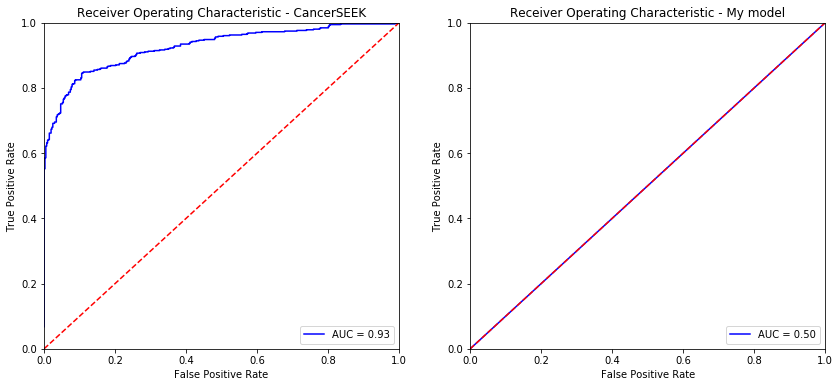

In [19]:
# calculate the fpr and tpr for all thresholds of the classification
# idea from here: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

fpr_cs, tpr_cs, threshold_cs = metrics.roc_curve(testY, cseek_score_test)
roc_auc_cs = metrics.auc(fpr_cs, tpr_cs)

ax[0].axes.set_title('Receiver Operating Characteristic - CancerSEEK')
ax[0].plot(fpr_cs, tpr_cs, 'b', label = 'AUC = %0.2f' % roc_auc_cs)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


probs = model.predict_proba(testX)
preds = probs[:,1] # probability values 
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

ax[1].axes.set_title('Receiver Operating Characteristic - My model')
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

plt.show()

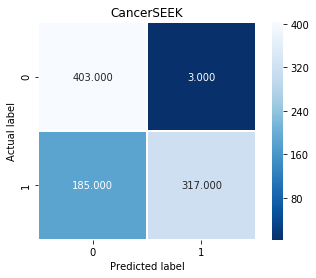

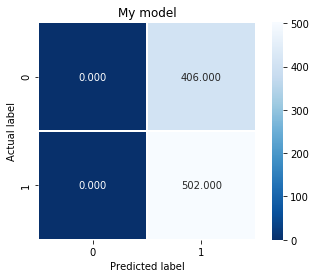

In [20]:
# Confusion matrix:

predicted_cs = cseekY_test
cm_cs = metrics.confusion_matrix(testY, predicted_cs)
sns.heatmap(cm_cs, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CancerSEEK')

plt.show()

predicted = model.predict(testX)
cm = metrics.confusion_matrix(testY, predicted)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('My model')

plt.show()

As you can see, my default SVM model performs quite poorly here, but probably changing it's parameters and scaling the input data would improve its performance a lot.

### 4.) Scale data and try different kernels

In [21]:
# scale data, split dataset:
df_clean = df.drop(['Tumor type', 'Sample ID #'], axis=1)
df_scaled = preprocessing.scale(df_clean)
trainX = df_scaled[::2] 
trainY = trueY[::2]
testX  = df_scaled[1::2]
testY = trueY[1::2]

In [22]:
# set up different models, fit data with different kernels:
model_poly = SVC(random_state=10, probability=True, kernel='poly').fit(trainX, trainY)
model_sigm = SVC(random_state=10, probability=True, kernel='sigmoid').fit(trainX, trainY)
model_rbf = SVC(random_state=10, probability=True, kernel='rbf').fit(trainX, trainY)
model_lin = SVC(random_state=10, probability=True, kernel='linear').fit(trainX, trainY)

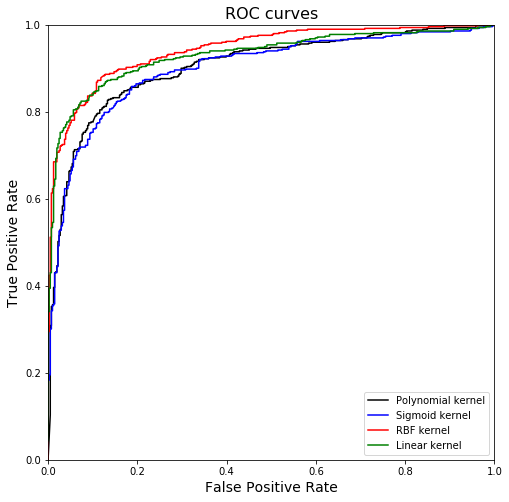

In [23]:
# Plot the ROC curves:

probs_poly = model_poly.predict_proba(testX)
preds_poly = probs_poly[:,1] # probability values for the logistic regression
fpr_poly, tpr_poly, threshold_poly = metrics.roc_curve(testY, preds_poly)
roc_auc_poly = metrics.auc(fpr_poly, tpr_poly)

probs_sigm = model_sigm.predict_proba(testX)
preds_sigm = probs_sigm[:,1] # probability values for the logistic regression
fpr_sigm, tpr_sigm, threshold_sigm = metrics.roc_curve(testY, preds_sigm)
roc_auc_sigm = metrics.auc(fpr_sigm, tpr_sigm)

probs_rbf = model_rbf.predict_proba(testX)
preds_rbf = probs_rbf[:,1] # probability values for the logistic regression
fpr_rbf, tpr_rbf, threshold_rbf = metrics.roc_curve(testY, preds_rbf)
roc_auc_rbf = metrics.auc(fpr_rbf, tpr_rbf)

probs_lin = model_lin.predict_proba(testX)
preds_lin = probs_lin[:,1] # probability values for the logistic regression
fpr_lin, tpr_lin, threshold_lin = metrics.roc_curve(testY, preds_lin)
roc_auc_lin = metrics.auc(fpr_lin, tpr_lin)


fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(111)


for p, l, c in zip([[fpr_poly, tpr_poly], [fpr_sigm, tpr_sigm], 
                 [fpr_rbf, tpr_rbf], [fpr_lin, tpr_lin]],
               ['Polynomial kernel', 'Sigmoid kernel',
               'RBF kernel', 'Linear kernel'],
                  ['black', 'blue', 'red', 'green']):
    ax1.plot(p[0], p[1], 'b', label=l, c=c)


plt.title('ROC curves', fontsize=16)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

On this scaled dataset, RBF and Linear kernels perform the best (with other parameters kept as default). <br>
In case of linear kernel, scaling improved the model's performance.

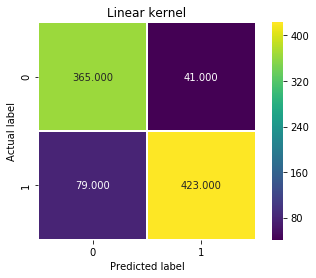

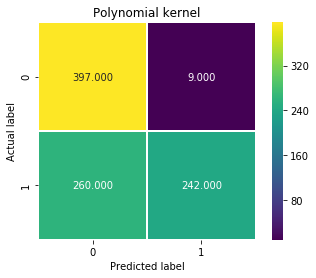

In [24]:
# Confusion matrices:
predicted_lin = model_lin.predict(testX)
acc_lin = model_lin.score(testX, testY)
cm_lin = metrics.confusion_matrix(testY, predicted_lin)

predicted_poly = model_poly.predict(testX)
acc_poly = model_poly.score(testX, testY)
cm_poly = metrics.confusion_matrix(testY, predicted_poly)

sns.heatmap(cm_lin, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Linear kernel')

plt.show()

sns.heatmap(cm_poly, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Polynomial kernel')

plt.show()

The confusion matrices also indicate that the model with linear kernel performs better on this scaled dataset, than on the non-scaled dataset. <br> Scaling the datasets makes separation more efficient.

### 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

In [25]:
# split dataset to 75:15:15:
X_train, X_test, y_train, y_test = train_test_split(df_clean, trueY, train_size=0.7, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=1) 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
# scale data:
X_train_scaled = preprocessing.scale(X_train)
X_val_scaled = preprocessing.scale(X_val)
X_test_scaled = preprocessing.scale(X_test)

In [27]:
# set up model, fit data:
model_rbf = SVC(random_state=12, probability=True, kernel='rbf').fit(X_train_scaled, y_train)

In [28]:
# train model with different C hyperparameters, store AUC scores:
Cs = []
AUCs = []
for c in [1e-6, 1e-5, 1e-4, 1e-2, 0.1, 0.15, 0.2, 0.5, 0.7, 1.5, 10, 1e2, 1e3, 1e4, 1e5]:
    model_rbf = SVC(kernel='rbf', random_state=0, probability=True, C=c)
    model_rbf.fit(X_train_scaled, y_train)
    preds = cross_val_predict(estimator=model_rbf, 
                              X=X_test_scaled, 
                              y=y_test, cv=5, method='predict_proba')
    Cs.append(c)
    AUCs.append(roc_auc_score(y_score=preds[:,1], y_true=y_test))

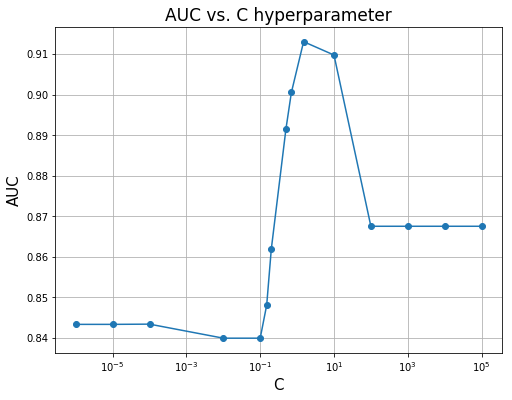

In [29]:
# Plot the data:
plt.figure(figsize=(8,6))
plt.plot(Cs, AUCs, 'o-')
plt.xscale('log')
plt.xlabel('C', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.title('AUC vs. C hyperparameter', fontsize=17)
plt.grid()

In [30]:
# train model with different gamma hyperparameters, store AUC scores:
Gs = []
AUCs = []
for g in [1e-10, 1e-9, 1e-8, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 30]:
    model_rbf = SVC(kernel='rbf', random_state=0, probability=True, C=1.0, gamma=g)
    model_rbf.fit(X_train_scaled, y_train)
    preds = cross_val_predict(estimator=model_rbf, 
                              X=X_test_scaled, 
                              y=y_test, cv=5, method='predict_proba')
    Gs.append(g)
    AUCs.append(roc_auc_score(y_score=preds[:,1], y_true=y_test))

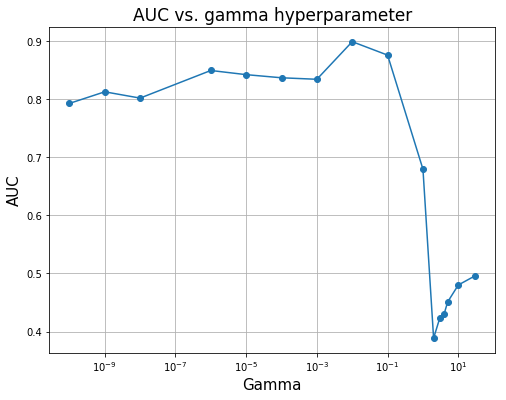

In [31]:
# Plot the data:
plt.figure(figsize=(8,6))
plt.plot(Gs, AUCs, 'o-')
plt.xscale('log')
plt.xlabel('Gamma', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.title('AUC vs. gamma hyperparameter', fontsize=17)
plt.grid()

In [32]:
# train model with different maximum iterations hyperparameters, store AUC scores:
iters = []
AUCs = []
for m in [10, 100, 1000, 5000, 10000, 20000]:
    model_rbf = SVC(random_state=0, probability=True, C=1.0, kernel='rbf', max_iter=m)
    model_rbf.fit(X_train_scaled, y_train)
    preds = cross_val_predict(estimator=model_rbf, 
                              X=X_test_scaled, 
                              y=y_test, cv=5, method='predict_proba')
    iters.append(m)
    AUCs.append(roc_auc_score(y_score=preds[:,1], y_true=y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: 

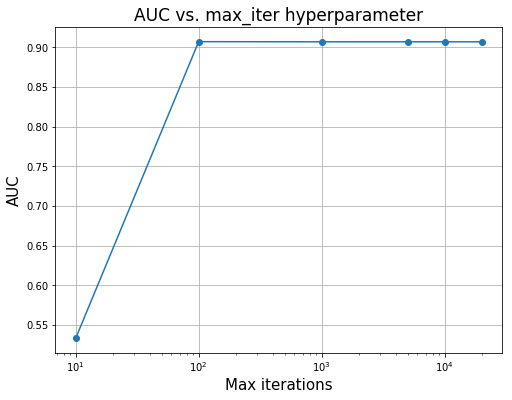

In [33]:
# Plot the data:
plt.figure(figsize=(8,6))
plt.plot(iters, AUCs, 'o-')
plt.xscale('log')
plt.xlabel('Max iterations', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.title('AUC vs. max_iter hyperparameter', fontsize=17)
plt.grid()

In [34]:
# train model with different C hyperparameters, and store train, test, and validation accuracy scores:
Cs = []
train_accuracies = []
test_accuracies = []
val_accuracies = []

for c in [1e-6, 1e-5, 1e-4, 1e-2, 0.1, 0.15, 0.2, 0.5, 0.7, 1.5, 10, 1e2, 1e3, 1e4, 1e5]:
    model_rbf = SVC(kernel='rbf', random_state=0, probability=True, C=c)
    model_rbf.fit(X_train_scaled, y_train)
    
    predicted = model_rbf.predict(X_train_scaled)
    train_accuracies.append(accuracy_score(y_train, predicted))
    
    predicted = model_rbf.predict(X_test_scaled)
    test_accuracies.append(accuracy_score(y_test, predicted))
    
    predicted = model_rbf.predict(X_val_scaled)
    val_accuracies.append(accuracy_score(y_val, predicted))
    
    Cs.append(c)
    
df_acc = pd.DataFrame({'Train accuracy':train_accuracies, 'Test accuracy':test_accuracies, 
                       'Validation accuracy':val_accuracies, 'C hyperparameter':Cs})

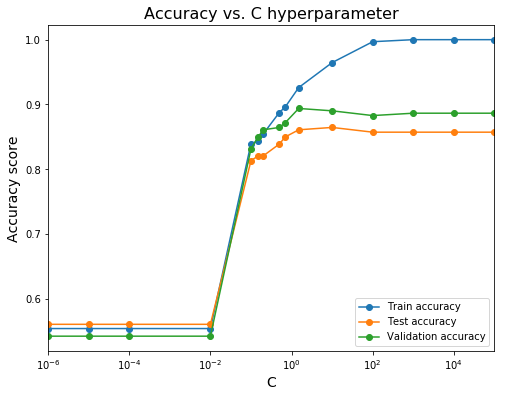

In [35]:
# Plot the data:
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

plt.plot(Cs, train_accuracies, 'o-', label='Train accuracy')
plt.plot(Cs, test_accuracies, 'o-', label='Test accuracy')
plt.plot(Cs, val_accuracies, 'o-', label='Validation accuracy')
plt.xscale('log')
plt.title('Accuracy vs. C hyperparameter', fontsize=16)
plt.legend(loc = 'lower right')
plt.xlim([1e-6, 1e5])
plt.xlabel('C', fontsize=14)
plt.ylabel('Accuracy score', fontsize=14)
plt.show()

In [36]:
# train model with different gamma hyperparameters, and store train, test, and validation accuracy scores:
Gs = []
train_accuracies = []
test_accuracies = []
val_accuracies = []

for g in [1e-10, 1e-9, 1e-8, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 15]:
    model_rbf = SVC(kernel='rbf', random_state=0, probability=True, C=1.0, gamma=g)
    model_rbf.fit(X_train_scaled, y_train)
    
    predicted = model_rbf.predict(X_train_scaled)
    train_accuracies.append(accuracy_score(y_train, predicted))
    
    predicted = model_rbf.predict(X_test_scaled)
    test_accuracies.append(accuracy_score(y_test, predicted))
    
    predicted = model_rbf.predict(X_val_scaled)
    val_accuracies.append(accuracy_score(y_val, predicted))
    
    Gs.append(g)
    
df_acc = pd.DataFrame({'Train accuracy':train_accuracies, 'Test accuracy':test_accuracies, 
                       'Validation accuracy':val_accuracies, 'Gamma hyperparameter':Gs})

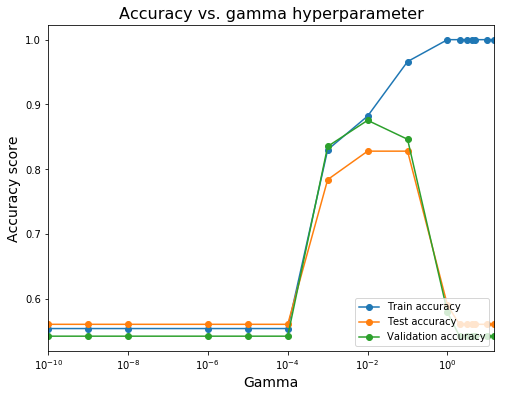

In [37]:
# Plot the data:
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

plt.plot(Gs, train_accuracies, 'o-', label='Train accuracy')
plt.plot(Gs, test_accuracies, 'o-', label='Test accuracy')
plt.plot(Gs, val_accuracies, 'o-', label='Validation accuracy')
plt.xscale('log')
plt.title('Accuracy vs. gamma hyperparameter', fontsize=16)
plt.legend(loc = 'lower right')
plt.xlim([1e-10, 15])
plt.xlabel('Gamma', fontsize=14)
plt.ylabel('Accuracy score', fontsize=14)
plt.show()

In both cases, the validation and test accuracy curves have similar shapes, but interestingly, the validation accuracy curve reaches higher levels.<br> 
My guess is that it's OK to rely on the validation data, since its curve's shape is similar to the test accuracy curve's shape.

In [38]:
# now we compare to the CancerSEEK's results:
X_train, X_test, y_train, y_test = train_test_split(df_clean, cseekY, train_size=0.7, random_state=1) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=1) 

# scale the data:
X_train_scaled = preprocessing.scale(X_train)
X_val_scaled = preprocessing.scale(X_val)
X_test_scaled = preprocessing.scale(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
# model with the best parameter settings:
final_model = SVC(kernel='rbf', random_state=9, probability=True, C=1.5, gamma=1e-2)

In [40]:
# train model:
final_model.fit(X_train_scaled, y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=9, shrinking=True, tol=0.001,
  verbose=False)

In [41]:
probs_final = final_model.predict_proba(X_test_scaled)
preds_final = probs_final[:,1] # probability values 
fpr_final, tpr_final, threshold_final = metrics.roc_curve(y_test, preds_final) # y_test here: CancerSEEK predictions
roc_auc_final = metrics.auc(fpr_final, tpr_final)

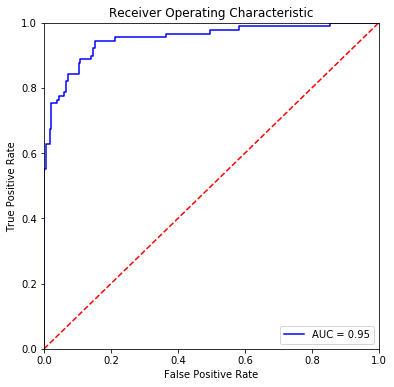

In [42]:
# Plot the data:
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_final, tpr_final, 'b', label = 'AUC = %0.2f' % roc_auc_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

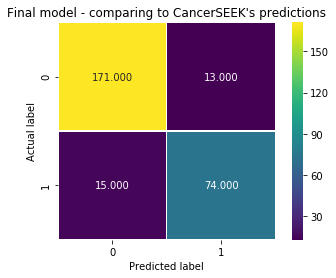

In [43]:
# Confusion matrix:
predicted = final_model.predict(X_test_scaled)
acc = final_model.score(X_test_scaled, y_test)
cm = metrics.confusion_matrix(y_test, predicted)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Final model - comparing to CancerSEEK's predictions")

plt.show()

These plots suggest, that our model performs similarly to CancerSEEK's model (maybe a little worse, AUC = 0.95).